## Find the Best Cross Validator For California Housing Dataset

### Pre Processing

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

x,y = fetch_california_housing(return_X_y=True,as_frame=True)


Show data

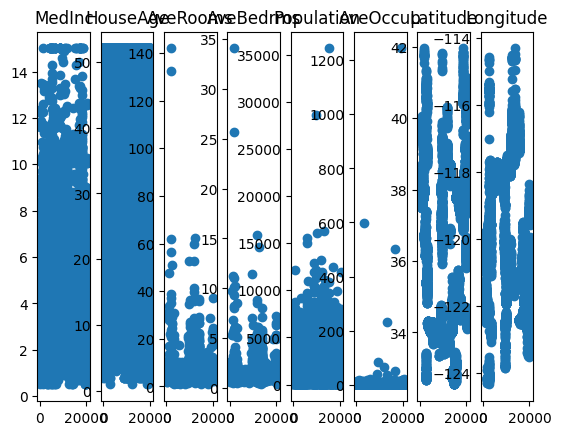

In [14]:
features = x.columns

for i in range (len(features)):
    plt.subplot(1,len(features),i+1)
    plt.scatter(np.arange(x.shape[0]),x[features[i]])
    plt.title(features[i])

plt.show()

Text(0.5, 0, 'Cross Validation')

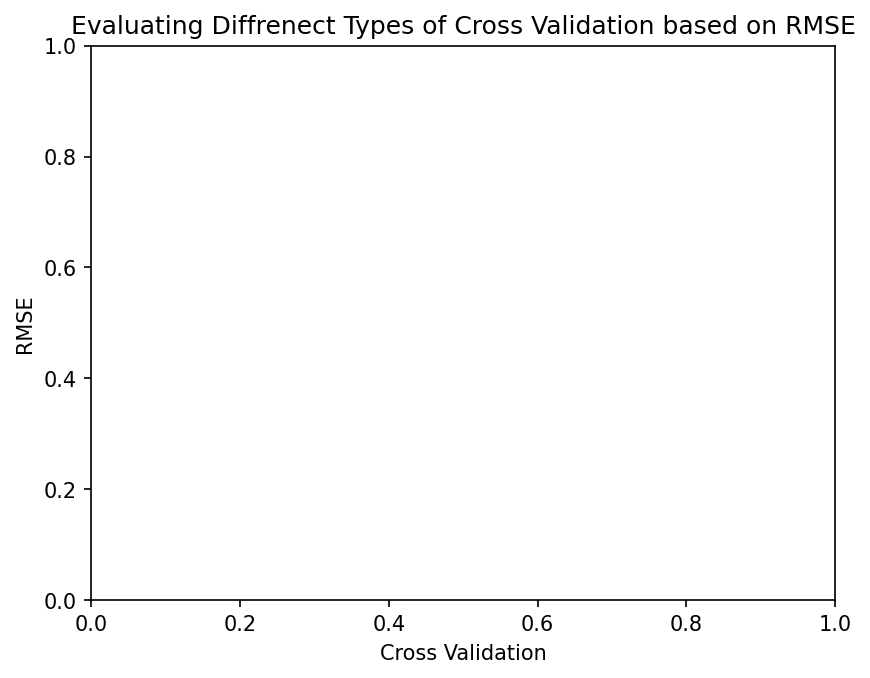

In [15]:
def calculate_rmse(dic,x_train,x_test,y_train,y_test,i):
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    dic[mean_squared_error(y_test,predict,squared=False)] = i
    return dic

fig, ax  = plt.subplots(dpi=150)
plt.title("Evaluating Diffrenect Types of Cross Validation based on RMSE")
plt.ylabel("RMSE")
plt.xlabel("Cross Validation")

### Train/Test Data Based on All Data

In [16]:
model = LinearRegression()

model.fit(x,y)

predict = model.predict(x)
print(f"All Data: {mean_squared_error(y,predict,squared=False)}")
ax.scatter("All Data",mean_squared_error(y,predict,squared=False),label="All Data")

All Data: 0.7241001216576387


### Train_Test_Split Cross Validator

In [17]:
from sklearn.model_selection import train_test_split

rmse = dict()

for i in range(43):
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=i)
    rmse = calculate_rmse(rmse,x_train,x_test,y_train,y_test,i)

print(f"The minimum of RMSE based on train_test_split in Random_State {rmse[min(rmse)]}: {min(rmse)}")
ax.scatter("Train_test_split(0.8)",min(rmse),label="Train_test_split")
ax.legend(["All Data","Train_test_split"])

The minimum of RMSE based on train_test_split in Random_State 22: 0.6994452357626344


### Leave_One_out Cross Validator


In [18]:
from sklearn.model_selection import LeaveOneOut

selector = LeaveOneOut()

rmse = dict()
count = 0
for train,test in selector.split(x):
    train = np.random.permutation(train)
    test = np.random.permutation(test)
    x_train = x.iloc[train]
    x_test = x.iloc[test]
    y_train = y[train]
    y_test = y[test]
    rmse = calculate_rmse(rmse,x_train,x_test,y_train,y_test,count)
    count += 1

print(f"The minimum of RMSE based on Leave_one_out in Random_State {rmse[min(rmse)]}: {min(rmse)}")
ax.scatter("Leave_One_Out",min(rmse))
ax.legend(["All Data","Train_test_split","Leave_One_Out"])

The minimum of RMSE based on Leave_one_out in Random_State 11683: 0.00013899743344469861


### Leave_P_Out Cross Validator



In [19]:
from sklearn.model_selection import LeavePOut

selector = LeavePOut(2)

rmse = dict()
count = 0
for train,test in selector.split(x):
    train = np.random.permutation(train)
    test = np.random.permutation(test)
    x_train = x.iloc[train]
    x_test = x.iloc[test]
    y_train = y[train]
    y_test = y[test]
    rmse = calculate_rmse(rmse,x_train,x_test,y_train,y_test,count)
    count += 1

print(f"The minimum of RMSE based on Leave_P(2)_Out in Random_State {rmse[min(rmse)]}: {min(rmse)}")
ax.scatter("Leave_P_Out(2)",min(rmse))
ax.legend(["All Data","Train_test_split","Leave_One_Out","Leave_P_out"])

KeyboardInterrupt: ignored

### KFold Cross Validator

In [20]:
from sklearn.model_selection import KFold
half_sample = x.shape[0]//2
selector = KFold(half_sample)

rmse = dict()
count = 0
for train,test in selector.split(x):
    train = np.random.permutation(train)
    test = np.random.permutation(test)
    x_train = x.iloc[train]
    x_test = x.iloc[test]
    y_train = y[train]
    y_test = y[test]
    rmse = calculate_rmse(rmse,x_train,x_test,y_train,y_test,count)
    count += 1

print(f"The minimum of RMSE based on KFold in Random_State {rmse[min(rmse)]}: {min(rmse)}")
ax.scatter(f"KFold({half_sample})",min(rmse),label="KFold")
ax.legend(["All Data","Train_test_split","Leave_One_Out","KFold"])

The minimum of RMSE based on KFold in Random_State 3539: 0.006188402036792222


Show All Result

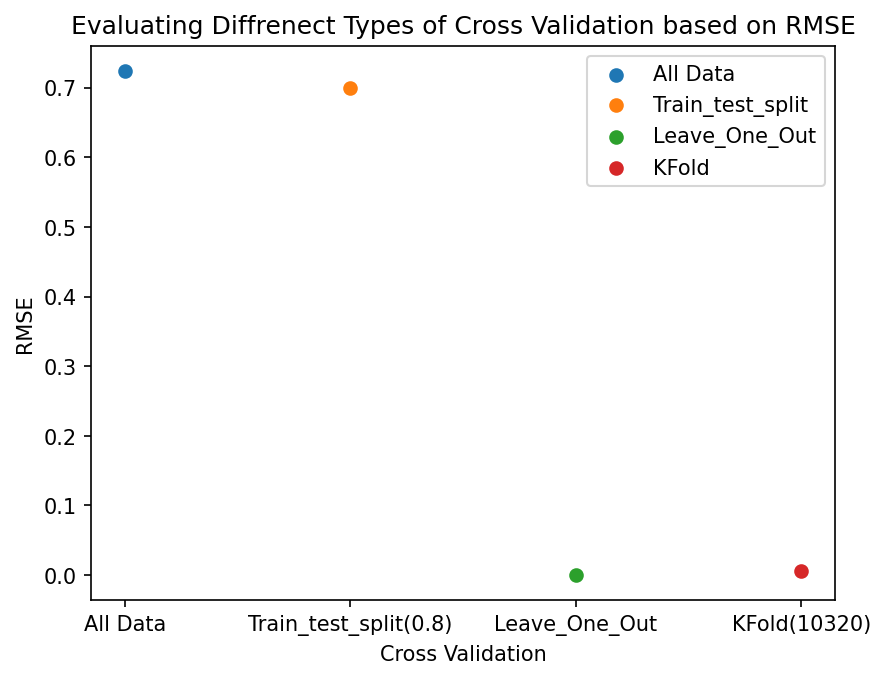

In [21]:
fig